In [15]:
import pandas as pd
from acquire import get_zillow_data

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
df = get_zillow_data()
df.head()

,parcelid,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,regionidzip,buildingqualitytypeid,decktypeid,pooltypeid10,pooltypeid2,pooltypeid7,regionidcity,regionidcounty,regionidneighborhood
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN,3.5,4.0,3.5,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,122,NaN,6.059063e+07,0.0,1.0,NaN,NaN,NaN,1998.0,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,96978.0,NaN,NaN,NaN,NaN,NaN,53571.0,1286.0,NaN
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN,1.0,2.0,1.0,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,1110,NaN,6.111001e+07,5.0,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,97099.0,NaN,NaN,NaN,NaN,NaN,13091.0,2061.0,NaN
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN,2.0,3.0,2.0,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,122,NaN,6.059022e+07,6.0,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,97078.0,NaN,NaN,NaN,NaN,1.0,21412.0,1286.0,NaN
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,NaN,3.0,4.0,3.0,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34245180.0,-118240722.0,13038.0,1.0,NaN,0101,LCR110000*,6.037300e+07,0.0,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,96330.0,8.0,NaN,NaN,NaN,1.0,396551.0,3101.0,NaN
4,12095076,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,NaN,3.0,4.0,3.0,NaN,2962.0,2962.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,34145202.0,-118179824.0,63000.0,1.0,NaN,0101,PSR2,6.037461e+07,0.0,NaN,1.0,NaN,NaN,1950.0,NaN,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,96293.0,9.0,NaN,NaN,NaN,1.0,47019.0,3101.0,274684.0


In [4]:
df.shape

(52320, 60)

In [5]:
df.drop(columns=['architecturalstyledesc','buildingclassdesc', 'storydesc', 'typeconstructiondesc', 'basementsqft', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet6', 'yardbuildingsqft26', 'fireplaceflag', 'pooltypeid10', 'poolsizesum', 'pooltypeid2', 'pooltypeid7', 'decktypeid', 'yardbuildingsqft17', 'finishedfloor1squarefeet', 'finishedsquarefeet50', 'numberofstories', 'garagecarcnt', 'garagetotalsqft', 'regionidneighborhood', 'buildingqualitytypeid', 'unitcnt', 'calculatedbathnbr'], inplace= True)

In [6]:
df['hashottuborspa'] = df['hashottuborspa'].fillna('N')
df['taxdelinquencyflag'] = df['taxdelinquencyflag'].fillna('N')
df['taxdelinquencyyear'] = df['taxdelinquencyyear'].fillna(0)
df['threequarterbathnbr'] = df['threequarterbathnbr'].fillna(0)
df['fireplacecnt'] = df['fireplacecnt'].fillna(0)
df['poolcnt'] = df['poolcnt'].fillna(0)
df['airconditioningdesc'] = df['airconditioningdesc'].fillna('None')
df['heatingorsystemdesc'] = df['heatingorsystemdesc'].fillna('None')
df['propertyzoningdesc'] = df['propertyzoningdesc'].fillna('None')


In [7]:
# Drop rows where either bedroomcnt or bathroomcnt is 0
df = df[(df['bedroomcnt'] != 0) & (df['bathroomcnt'] != 0)]

In [8]:
df = df.dropna()

In [9]:
df.head()

,parcelid,logerror,transactiondate,airconditioningdesc,heatingorsystemdesc,propertylandusedesc,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fireplacecnt,fullbathcnt,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,roomcnt,threequarterbathnbr,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,regionidzip,regionidcity,regionidcounty
0,14297519,0.025595,2017-01-01,None,None,Single Family Residential,3.5,4.0,3100.0,3100.0,6059.0,0.0,3.0,N,33634931.0,-117869207.0,4506.0,0.0,122,None,6.059063e+07,0.0,1.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,N,0.0,6.059063e+13,96978.0,53571.0,1286.0
1,17052889,0.055619,2017-01-01,None,None,Single Family Residential,1.0,2.0,1465.0,1465.0,6111.0,1.0,1.0,N,34449266.0,-119281531.0,12647.0,0.0,1110,None,6.111001e+07,5.0,0.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,N,0.0,6.111001e+13,97099.0,13091.0,2061.0
2,14186244,0.005383,2017-01-01,None,None,Single Family Residential,2.0,3.0,1243.0,1243.0,6059.0,0.0,2.0,N,33886168.0,-117823170.0,8432.0,1.0,122,None,6.059022e+07,6.0,0.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,N,0.0,6.059022e+13,97078.0,21412.0,1286.0
3,12177905,-0.103410,2017-01-01,None,Central,Single Family Residential,3.0,4.0,2376.0,2376.0,6037.0,0.0,3.0,N,34245180.0,-118240722.0,13038.0,1.0,0101,LCR110000*,6.037300e+07,0.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,N,0.0,6.037300e+13,96330.0,396551.0,3101.0
4,12095076,-0.001011,2017-01-01,Central,Central,Single Family Residential,3.0,4.0,2962.0,2962.0,6037.0,0.0,3.0,N,34145202.0,-118179824.0,63000.0,1.0,0101,PSR2,6.037461e+07,0.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,N,0.0,6.037461e+13,96293.0,47019.0,3101.0


In [12]:
df.shape

(50533, 35)

In [18]:
# Set a fixed random seed for reproducibility
seed = 42

# First split: 70% for training, 30% for validation and test combined
train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df['logerror'])

# Second split: Split the remaining 30% into validation (15%) and test (15%)
val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=df['logerror']) 

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [17]:
train_val, test = train_test_split(
    df, 
    train_size=0.8, 
    stratify=df['logerror'], 
    random_state=42)
train, validate = train_test_split(
    train_val,
    train_size=0.7,
    stratify=df['logerror'], 
    random_state=42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [10]:
# narrow down my features to what I want to explore on
numericals = ['logerror_scaled', 'taxvaluedollarcnt', 'yearbuilt']
categoricals = ['fips']
outlier_cols = ['bathroomcnt', 'bedroomcnt']
explore_cols = numericals + categoricals

NameError: name 'train' is not defined

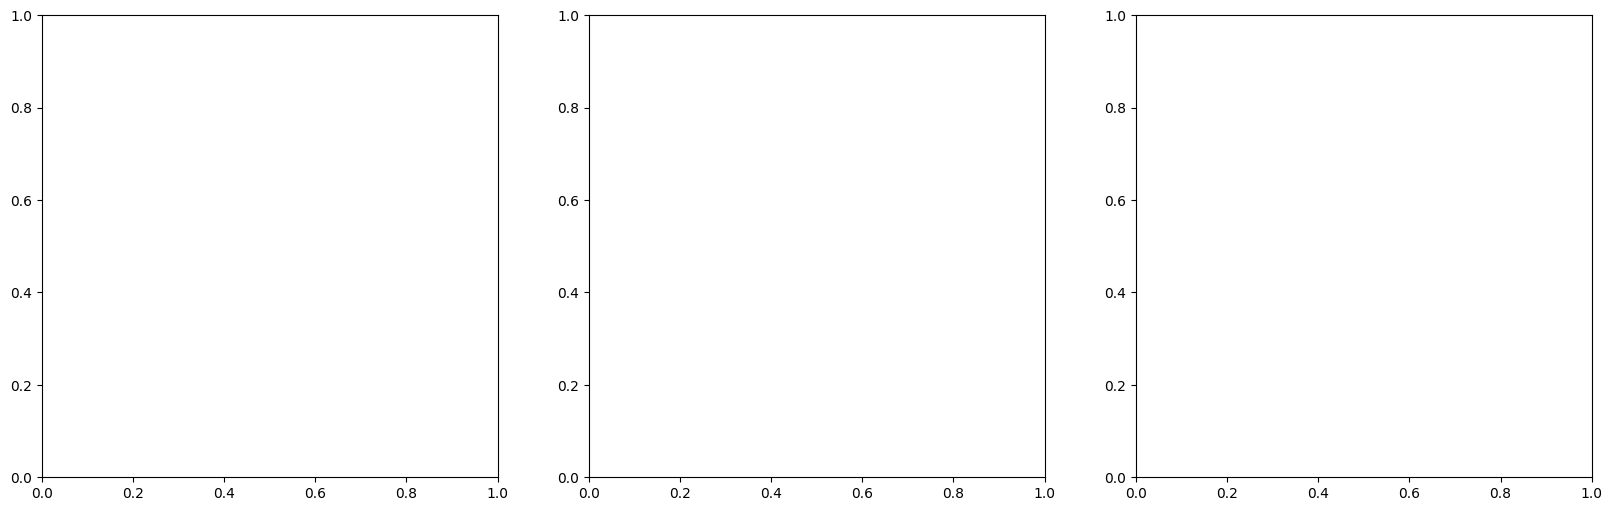

In [11]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
    

    # Q1 = train[col].quantile(0.25)
    # Q3 = train[col].quantile(0.75)
    # IQR = Q3 - Q1

    # # Define the upper bound based on the IQR
    # upper_bound = Q3 + 20 * IQR

    # ax.set_xlim([0, upper_bound]) 
    
plt.show()